## For the competition, we will use a regression model which is *Sequential*

In [43]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython import display

import math

print(tf.__version__)

1.12.0


# Get the data

We get the data from the website

In [3]:
dataset_path = 'data/train_dataset.csv'

column_names = ['user_id',
                'is_set_real_name',
               'user_age',
               'is_college_stu',
               'is_dans_blacklist',
               'is_4G_not_healthy',
               'user_network_age_month',
               'user_last_payment_time_month',
               'user_last_payment_amount_month',
               'user_last_6_month_average_spending',
               'user_bill_last_month',
               'user_current_account',
               'is_owed',
               'user_call_sensetivity',
               'number_of_people_called',
               'whether_go_shopping_often',
               'times_in_shopping_center',
               'is_go_wanda',
               'is_menber_shanmu',
               'is_watch_movie',
               'is_go_trip',
               'is_go_gym',
               'times_app_shopping',
               'times_app_delivery',
               'times_app_finance',
               'times_app_vedio',
               'times_app_flight',
               'times_app_train',
               'times_app_voyage',
               'credit_value']


raw_dataset = pd.read_csv(dataset_path, skiprows=1,names=column_names)
dataset = raw_dataset.copy()

display.display(dataset.describe())


,is_set_real_name,user_age,is_college_stu,is_dans_blacklist,is_4G_not_healthy,user_network_age_month,user_last_payment_time_month,user_last_payment_amount_month,user_last_6_month_average_spending,user_bill_last_month,...,is_go_trip,is_go_gym,times_app_shopping,times_app_delivery,times_app_finance,times_app_vedio,times_app_flight,times_app_train,times_app_voyage,credit_value
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


# Clean the data

Since The dataset doesn't contain unknown values, we do nothing about this.

But the column **user_id** is useful we will drop it.

In [4]:
dataset.pop('user_id')
#dataset.isna().sum()

0        a4651f98c82948b186bdcdc8108381b4
1        aeb10247db4e4d67b2550bbc42ff9827
2        5af23a1e0e77410abb25e9a7eee510aa
3        43c64379d3c24a15b8478851b22049e4
4        f1687f3b8a6f4910bd0b13eb634056e2
5        52795d470db4478584f6c92f66af0294
6        0d758e1b10cc4f618dda9f87fc948068
7        b05585f9635245f282bf2cffd3c5773c
8        acde81ca14eb429a983bec773e16098c
9        1f78ee310e9d48449b8d5a1fd1537286
10       d31faf885c0a459f9300fbd34e48659b
11       9bccdf40cb5f42fe92f7269bb61fea60
12       f774fe1f52ed4f5491feb3fae86f8299
13       f7dc2128399649f0ab25c84d5b9399e0
14       3b014e46bb10416ba332b9d211a86f74
15       4947c8f0dea841c3b5e98147219c029d
16       0fed9cf060d446ddb9ba5218e5587544
17       d778374083bf4ed7ab99e41fa3fc4481
18       18afa4b64d614e9fbfa01e912421c93a
19       91a9873242ac463a97c25b3d70095aee
20       beb6a55e6f7a455f899eea1a367987a1
21       ac720ead83fd4060ab63ef73b1f461cd
22       b96e489af8ca4fc58cc6d467ebf4bc58
23       0d8dfc4a55fd4358aa1208b0c

## Split the data 

- We will split the data into **train_set**, **validation_set** 

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

## Inspect data

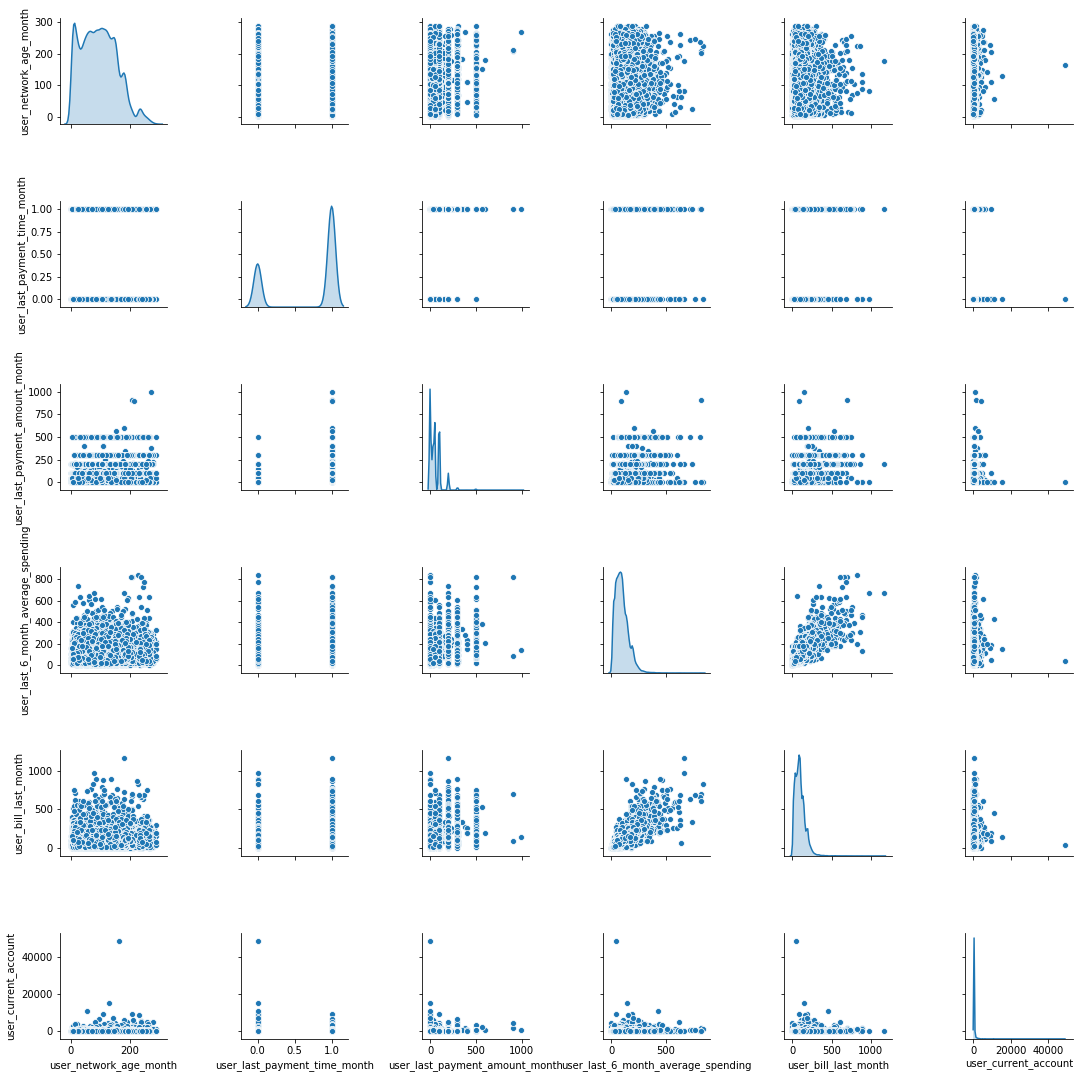

In [6]:
sns.pairplot(dataset.iloc[:,5:11], diag_kind="kde")

In [7]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

test_stats = test_dataset.describe()
test_stats = test_stats.transpose()

## Split features from labels 

- We want to split dataset into **example** and **target**

In [27]:
def preselect_features(dataframe,selected_feature=None):
    if not selected_feature:
        selected_feature = [
               'is_set_real_name',
               'user_age',
               'is_college_stu',
               'is_dans_blacklist',
               'is_4G_not_healthy',
               'user_network_age_month',
               'user_last_payment_time_month',
               'user_last_payment_amount_month',
               'user_last_6_month_average_spending',
               'user_bill_last_month',
               'user_current_account',
               'is_owed',
               'user_call_sensetivity',
               'number_of_people_called',
               'whether_go_shopping_often',
               'times_in_shopping_center',
               'is_go_wanda',
               'is_menber_shanmu',
               'is_watch_movie',
               'is_go_trip',
               'is_go_gym',
               'times_app_shopping',
               'times_app_delivery',
               'times_app_finance',
               'times_app_vedio',
               'times_app_flight',
               'times_app_train',
               'times_app_voyage',
         ]
    select_dataframe = dataframe[selected_feature]
    preselect_dataframe = select_dataframe.copy()
    return preselect_dataframe

def target_feature(dataframe, target=None):
    if not target:
        target = 'credit_value'
        target_feature = pd.DataFrame()
        target_feature['target'] = dataframe[target]
        return target_feature
    else :
        return dataframe[target]


## Normalize the data

Because the datas are so different, which increases the complexity of training the model, so it is good way to normalize features using different scales and ranges. 

- Here, we start to use **mean** and **std** of the dataset to normalize
- We can use **linear scale**
```python
def linear_scale(series):
    min_val = series.min()
    max_val = series.max()
    scale = (max_val - min_val) / 2.0
    return series.apply(lambda x:((x - min_val) / scale) - 1.0)
```
- We can use **log scale**
- ...

The normalized data is what we will use to train the model

In [28]:
def norm(data, stats):
    return (data - stats['mean']) / stats['std']

normed_train_dataset = norm(train_dataset, train_stats)
normed_test_dataset = norm(test_dataset, test_stats)

normed_train_dataset = preselect_features(normed_train_dataset)
train_garget = target_feature(train_dataset)

normed_test_dataset = preselect_features(normed_test_dataset)
test_target = target_feature(test_dataset)

## Build the model
- Here, we use **Sequential**, here is the example of [Sequetial](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#class_sequential)
- We use the densely connected hidden layers, and an output layer that returns a single, continuous value.

In [29]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu,input_shape=[len(normed_train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mean_squared_error',
                 optimizer = optimizer,
                 metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [30]:
model = build_model()

Take a short look on the description of the model

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


It seems the model works, let's try out the model by predicting a bit of examples from the training dataset using **model.predict**

In [34]:
example_batch = normed_train_dataset[:10]
model.predict(example_batch)

array([[-0.19408557],
       [-0.33492088],
       [-0.23233746],
       [-0.16244431],
       [-0.07056578],
       [-0.10458604],
       [-0.34900367],
       [-0.03804564],
       [ 0.16034387],
       [ 0.5146931 ]], dtype=float32)

## Train the model

- Here, we train the model for 1000 epoche, and after that record the training and validation accuracy from **history** return by **model.fit**
- We use **batch_size** = 32, if not defined, default is 32
- We use 20% of the data as the validation dataset, by define **validation_split** 0.2
- We define the class **PrintProgress** inherit from **keras.callbacks.Callback** for print the progress of training

In [39]:
EPOCH = 1000
class PrintProgress(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if (epoch+1)%100 == 0:
            print(' compelet %d %%'%(((epoch+1)/100)*10))
    def on_train_begin(self, logs):
        print('start training the model ...')
    def on_train_end(self, logs):
        print('finish training the model!')
history = model.fit(
    normed_train_dataset, train_garget,
    epochs=EPOCH, validation_split=0.2, verbose=0,
    callbacks=[PrintProgress()]
)

Visualize the **mean_absolute_error** and **mean_squared_error** by the history returned by model.fit

In [47]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [target]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,200])
    plt.legend()
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$target^2$]')
    #plt.ylabel('Mean Square Error [target]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,1000])
    plt.legend()
    plt.show()




## Simplify the model

As we see in the graphe above, the line of **mean_absolute_error** oscillates in the average of 7 when the epoch > 100, so we want to update **model.fit** to automatically stop training when the validation prediction doesn't improve. Here, we got that there exist [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping?hl=ch) callback which tests the training condition in each epoch. So, here if the model doesn't imporve with 10 epochs, we stop training using the arguments **patience**

In [40]:
new_model = build_model()
stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

new_history = new_model.fit(
    normed_train_dataset, train_garget,
    epochs=EPOCH, validation_split=0.2, verbose=0,
    callbacks=[stop_callback, PrintProgress()]
)


start training the model ...
finish training the model!


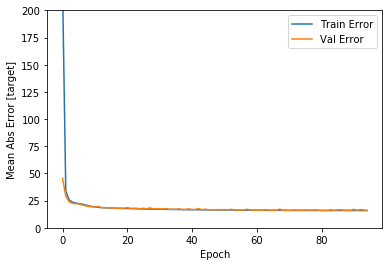

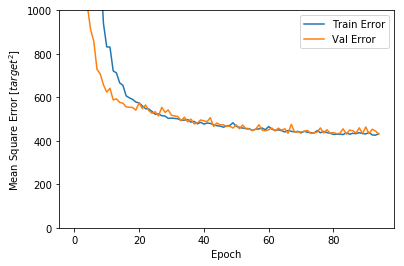

In [48]:
plot_history(new_history)

## Make predictions

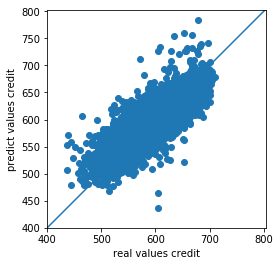

In [54]:
test_predict = new_model.predict(normed_test_dataset).flatten()

plt.scatter(test_target, test_predict)
plt.xlabel('real values credit')
plt.ylabel('predict values credit')

plt.axis('equal')
plt.axis('square')
plt.xlim([400, plt.xlim()[1]])
plt.ylim([400, plt.ylim()[1]])

plt.plot([400,900],[400,900])

Have a look on the error distribution

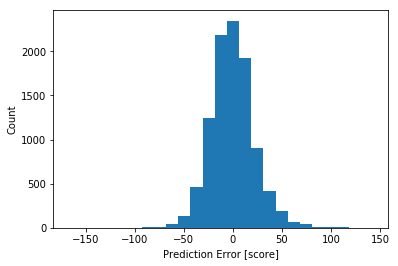

In [56]:
error = test_predict - test_target.iloc[:,0]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [score]")
_ = plt.ylabel("Count")


## Make submit predictions and write the results to submit.csv

In [68]:
submit_path = 'data/test_dataset.csv'
submit_dataset = pd.read_csv(submit_path, skiprows=1,names=column_names)
submit_dataset = preselect_features(submit_dataset)
submit_stat = submit_dataset.describe()
submit_stat = submit_stat.transpose()
normed_submit_dataset = norm(submit_dataset, submit_stat)
submit_predict = new_model.predict(normed_submit_dataset)
submit_predict = submit_predict.astype(int)
display.display(submit_predict)

array([[595],
       [550],
       [675],
       ...,
       [545],
       [533],
       [547]])

In [70]:
userid_path = 'data/submit_example.csv'
userid_dataset = pd.read_csv(userid_path)
display.display(userid_dataset.head())

write = pd.DataFrame()
write['id'] = userid_dataset['id']
write['score'] = submit_predict

display.display(write)

,id,score
0,7171737d49b143d1b38883a39e4a5730,600
1,3af0a449d5424488912e8fb2bf4b9faa,600
2,eb2cf02e0d5c4d1294dd73e776dbb441,600
3,9c0f780ecb254670a11aa9e3f10777c5,600
4,d794eed46c1e44f785a575f18b3023a5,600


,id,score
0,7171737d49b143d1b38883a39e4a5730,595
1,3af0a449d5424488912e8fb2bf4b9faa,550
2,eb2cf02e0d5c4d1294dd73e776dbb441,675
3,9c0f780ecb254670a11aa9e3f10777c5,678
4,d794eed46c1e44f785a575f18b3023a5,656
5,18f6a7d824a1421b9da3e5f10854c3df,608
6,e7b63888a36f499a88811c0936bb12df,639
7,f995ef4d96fc426191a104421b0f5b20,563
8,11a3ce45ce234f7db4e91e5f152dc8b8,667
9,86ebeac087284c87bbcb1281d95ef9eb,580


In [72]:
write.to_csv('submit.csv', index=False)